In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve, GridSearchCV
from sklearn import datasets

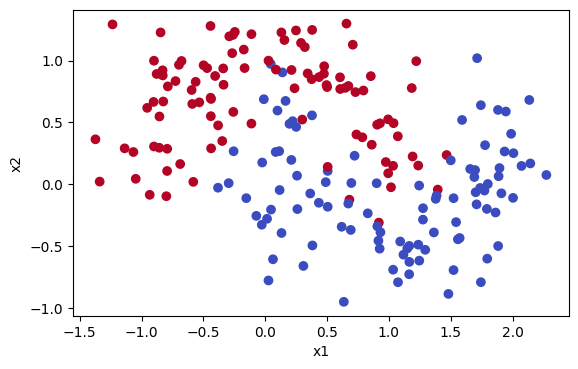

In [14]:
# load and plot the famous moons dataset from sklearn
xdat, ydat = datasets.make_moons(n_samples=200, noise=0.25, random_state=8)
fig0, ax0 = plt.subplots()
ax0.scatter(xdat[:,0], xdat[:,1], c=1-ydat, cmap='coolwarm') # set color to c=1-ydat to reverse colors of the moons
ax0.set(xlabel='x1', ylabel='x2')
ax0.set_aspect('equal')

Number of support vectors: 32


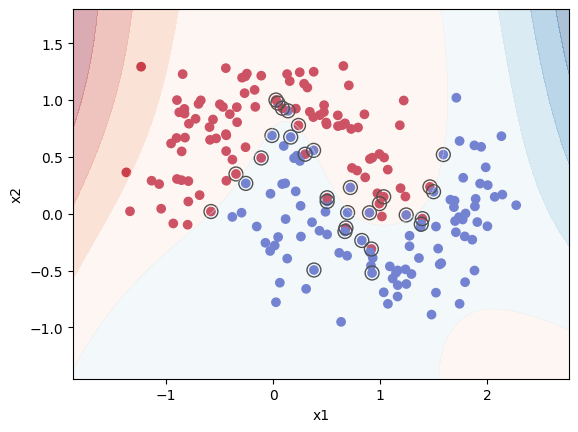

In [25]:
# explore classification using rbf kernel by varying hyperparameters
clf = SVC(C=10000000, kernel='rbf', gamma=0.1)
clf.fit(xdat, ydat)

# get support vectors
sv = clf.support_vectors_
print('Number of support vectors:', sv.shape[0])

# set ranges for plots
meshstep = 0.01
x1_min, x1_max = xdat[:,0].min() - .5, xdat[:,0].max() + .5
x2_min, x2_max = xdat[:,1].min() - .5, xdat[:,1].max() + .5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, meshstep), np.arange(x2_min, x2_max, meshstep))

# plot the decision function, which is proportional to the distance from the decision boundary
# (lighter colors cover points closer to the decision boundary)
z = clf.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
z = z.reshape(xx1.shape)
fig1, ax1 = plt.subplots()
ax1.scatter(xdat[:,0], xdat[:,1], c=1-ydat, cmap='coolwarm')
# sv
ax1.scatter(sv[:,0], sv[:,1], s=100, facecolors='none', edgecolors='k')
ax1.set(xlabel='x1', ylabel='x2')
ax1.contourf(xx1, xx2, z, cmap=plt.cm.RdBu, alpha=0.35) 

In [26]:
## IN THE FOLLOWING SECTION, WE WILL TRAIN RBF KERNEL SVC USING FIXED C=1

# (Note: n_jobs has been added to speed up calculations via parallelization, 
# you may adjust this based on your processor or default to 1; 
# verbose has also been added to print out information while the function is running.)
clf_fixedC = SVC(C=1, kernel='rbf')
gammalist = np.logspace(-3,3,num=7)
train_scores, valid_scores = validation_curve(clf_fixedC, xdat, ydat, param_name='gamma', param_range=gammalist, cv=10, n_jobs=4, verbose=1)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    1.8s finished


In [27]:
# compute the mean training and validation errors over k folds for each gamma
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

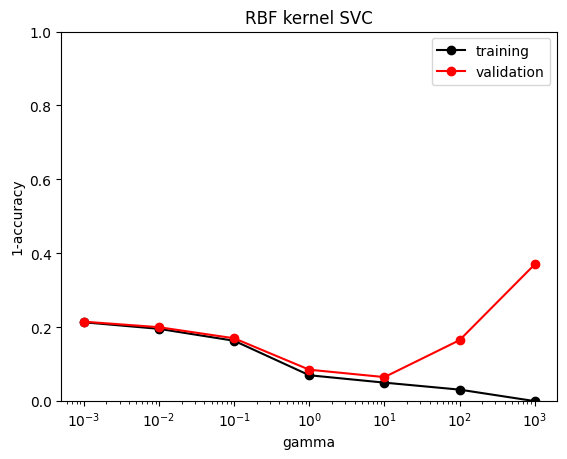

In [28]:
# plot training and validation error as a function of gamma
fig2, ax2 = plt.subplots()
ax2.plot(gammalist, 1-train_scores_mean, 'k-o', label='training')
ax2.plot(gammalist, 1-valid_scores_mean, 'r-o', label='validation')
ax2.set(xlabel='gamma', ylabel='1-accuracy', xscale='log', ylim=[0,1], title='RBF kernel SVC')
ax2.legend(loc='best')

In [29]:
print(1-valid_scores_mean)

[0.215 0.2   0.17  0.085 0.065 0.165 0.37 ]


In [10]:
## IN THE FOLLOWING SECTION, WE WILL USE GRID SEARCH OVER C AND GAMMA, WITH 10-FOLD CV

# (Note: n_jobs has been added to speed up calculations via parallelization, 
# you may adjust this based on your processor or default to 1; 
# verbose has also been added to print out information while the function is running.)
Clist = np.logspace(-8,6,num=8)
gammalist = np.logspace(-3,3,num=7)
parameters = {'C':Clist, 'gamma':gammalist}
clf_gridsearch = GridSearchCV(SVC(kernel='rbf'), parameters, cv=10, n_jobs=4, verbose=1)
clf_gridsearch.fit(xdat, ydat)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=4,
             param_grid={'C': array([1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04, 1.e+06]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             verbose=1)

The best parameters are {'C': 10000.0, 'gamma': 0.1} with a validation accuracy of 0.94


([<matplotlib.axis.YTick at 0x133224dc0>,
 [Text(0, 0, '1e-08'),
  Text(0, 1, '1e-06'),
  Text(0, 2, '0.0001'),
  Text(0, 3, '0.01'),
  Text(0, 4, '1.0'),
  Text(0, 5, '100.0'),
  Text(0, 6, '10000.0'),
  Text(0, 7, '1000000.0')])

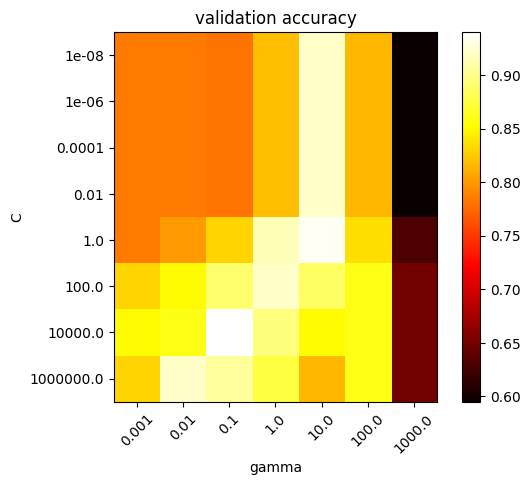

In [11]:
# print the best hyperparameters and plot the heat map of validation errors
print("The best parameters are %s with a validation accuracy of %0.2f" % (clf_gridsearch.best_params_, clf_gridsearch.best_score_))

scores = clf_gridsearch.cv_results_['mean_test_score'].reshape(len(Clist),len(gammalist))
fig3, ax3 = plt.subplots()
currentimage = ax3.imshow(scores, cmap=plt.cm.hot)
ax3.set(xlabel='gamma', ylabel='C', title='validation accuracy')
fig3.colorbar(currentimage)
plt.xticks(np.arange(len(gammalist)), gammalist, rotation=45)
plt.yticks(np.arange(len(Clist)), Clist)

In [12]:
print(scores)

[[0.785 0.785 0.78  0.82  0.92  0.815 0.595]
 [0.785 0.785 0.78  0.82  0.92  0.815 0.595]
 [0.785 0.785 0.78  0.82  0.92  0.815 0.595]
 [0.785 0.785 0.78  0.82  0.92  0.815 0.595]
 [0.785 0.8   0.83  0.915 0.935 0.835 0.63 ]
 [0.83  0.85  0.89  0.92  0.885 0.86  0.65 ]
 [0.85  0.86  0.94  0.895 0.85  0.86  0.65 ]
 [0.83  0.92  0.905 0.875 0.815 0.86  0.65 ]]
